In [ ]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


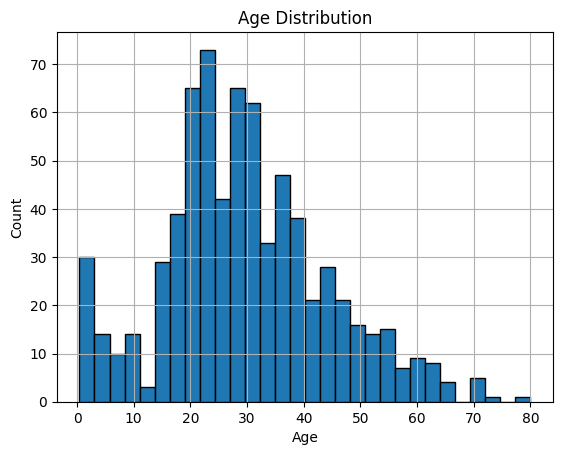

In [181]:
df['Age'].hist(bins=30, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

In [182]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [183]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [184]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [185]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [186]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

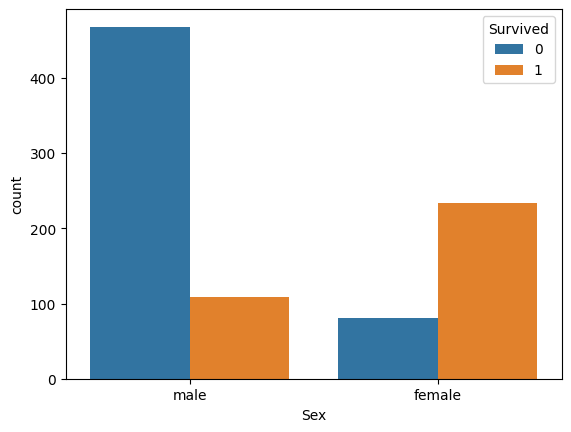

In [187]:
sns.countplot(data=df, x='Sex', hue='Survived')


In [188]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [189]:
label=LabelEncoder()
df['Embarked']=label.fit_transform(df['Embarked'])
df['Sex']=label.fit_transform(df['Sex'])


In [190]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [191]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [192]:
features=df.drop(['Survived'],axis=1)
target=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

<Axes: xlabel='Age', ylabel='Fare'>

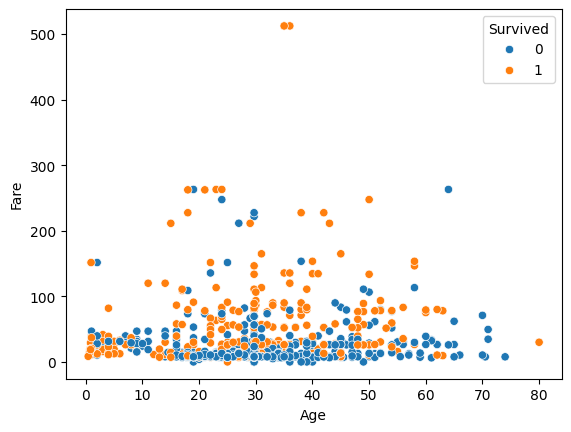

In [193]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')


<Axes: >

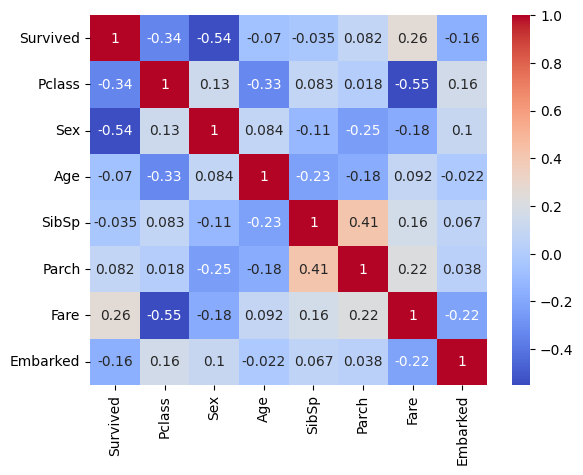

In [194]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


C:\Users\Hashir\AppData\Local\Temp\ipykernel_12688\729947384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], palette='coolwarm')  # ← note x instead of y
C:\Users\Hashir\AppData\Local\Temp\ipykernel_12688\729947384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], palette='coolwarm')  # ← note x instead of y
C:\Users\Hashir\AppData\Local\Temp\ipykernel_12688\729947384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], palette='coolwarm')  # ← note x instead of y
C:\Users\Hashir\AppData\Loca

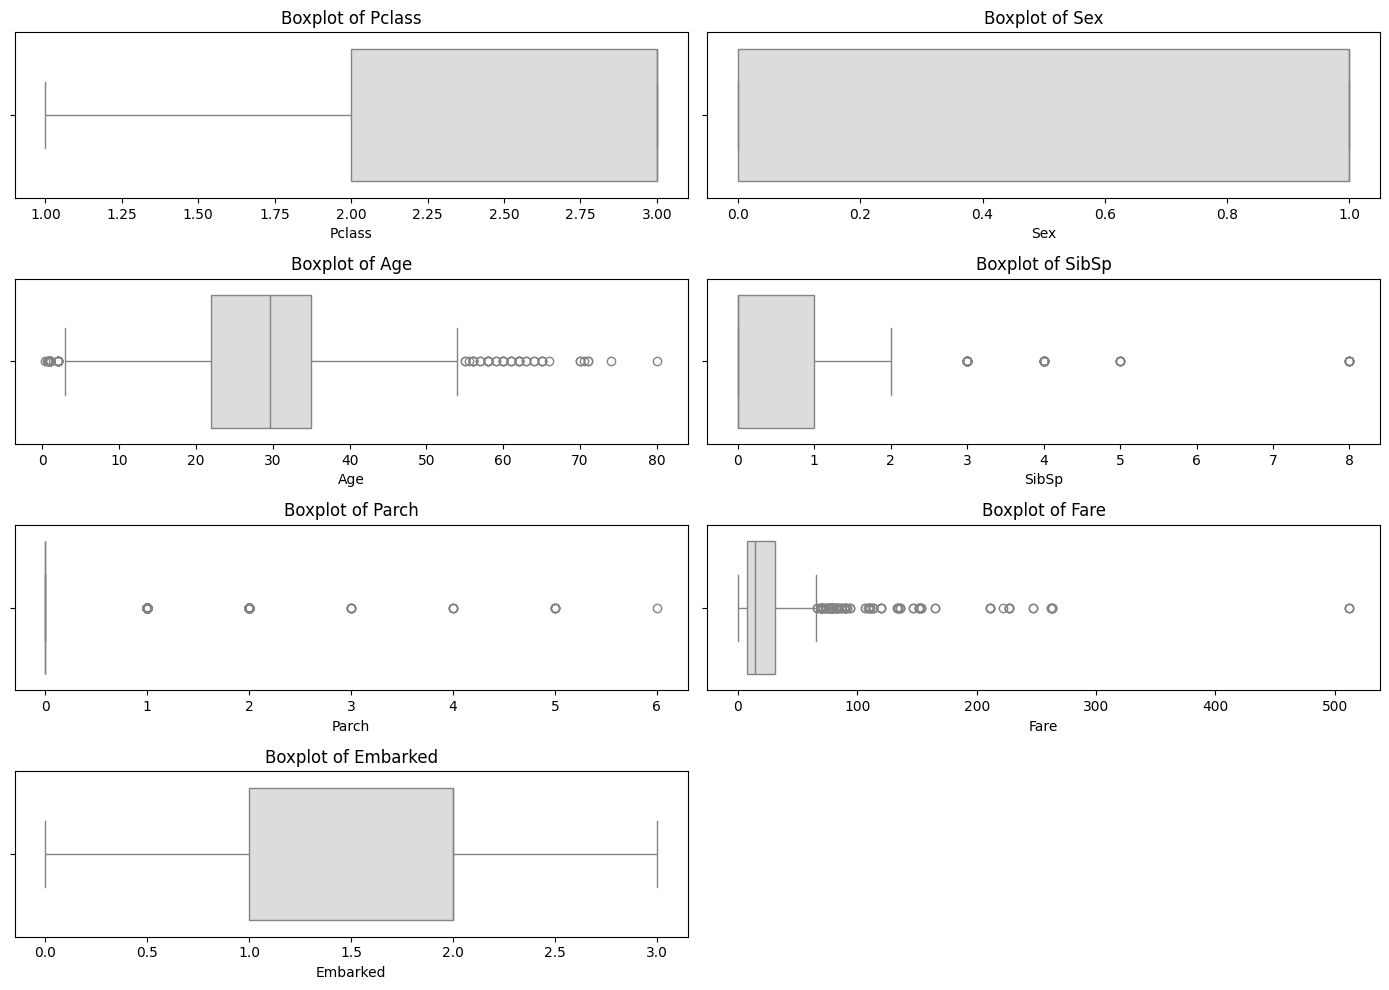

In [195]:

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[feature], palette='coolwarm')  # ← note x instead of y
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [196]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [197]:
model_tree = DecisionTreeClassifier(criterion='entropy')  # or 'entropy'
model_tree.fit(x_train, y_train)
print(model_tree.score(x_test,y_test))

0.7932960893854749


In [198]:
nb = GaussianNB()
nb.fit(x_train, y_train)
print(nb.score(x_test, y_test))

0.776536312849162


In [199]:

best_score = 0
best_k = 1

for k in range(1, 10): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    print(f'k = {k}, Accuracy = {score:.4f}')
    
    if score > best_score:
        best_score = score
        best_k = k

print(f'\n✅ Best accuracy: {best_score:.4f} with k = {best_k}')



k = 1, Accuracy = 0.7765
k = 2, Accuracy = 0.8268
k = 3, Accuracy = 0.7933
k = 4, Accuracy = 0.7933
k = 5, Accuracy = 0.7989
k = 6, Accuracy = 0.7877
k = 7, Accuracy = 0.8212
k = 8, Accuracy = 0.8101
k = 9, Accuracy = 0.7877

✅ Best accuracy: 0.8268 with k = 2


            Pipelines       
            

In [25]:

df = pd.read_csv('titanic.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
target = df['Survived']
features = df.drop('Survived', axis=1)

categorical_cols = ['Sex', 'Embarked']
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x_train_raw, x_test_raw, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

tree_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
])

tree_pipeline.fit(x_train_raw, y_train)
print("Accuracy on test set:", tree_pipeline.score(x_test_raw, y_test))


Accuracy on test set: 0.7932960893854749


In [26]:
nb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', GaussianNB())
])

nb_pipeline.fit(x_train_raw, y_train)
print("Naive Bayes Accuracy:", nb_pipeline.score(x_test_raw, y_test))

Naive Bayes Accuracy: 0.776536312849162


In [28]:
knn_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=2))
])

knn_pipeline.fit(x_train_raw, y_train)
print("KNN Accuracy:", knn_pipeline.score(x_test_raw, y_test))

KNN Accuracy: 0.8212290502793296


In [29]:
from sklearn.model_selection import cross_val_score

nb_scores = cross_val_score(nb_pipeline, features, target, cv=5)
print("Naive Bayes CV Accuracy Scores:", nb_scores)
print("Naive Bayes Mean Accuracy:", np.mean(nb_scores))

Naive Bayes CV Accuracy Scores: [0.76536313 0.79775281 0.78651685 0.79213483 0.80337079]
Naive Bayes Mean Accuracy: 0.7890276818780995


In [30]:
knn_scores = cross_val_score(knn_pipeline, features, target, cv=5)
print("KNN CV Accuracy Scores:", knn_scores)
print("KNN Mean Accuracy:", np.mean(knn_scores))

KNN CV Accuracy Scores: [0.73184358 0.76404494 0.81460674 0.80337079 0.80337079]
KNN Mean Accuracy: 0.7834473667691921


decision tree
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



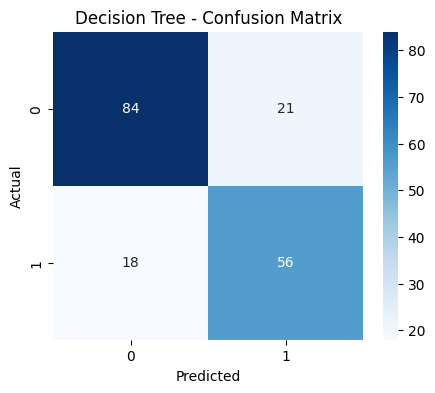

Naive Bayes
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       105
           1       0.71      0.68      0.69        74

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



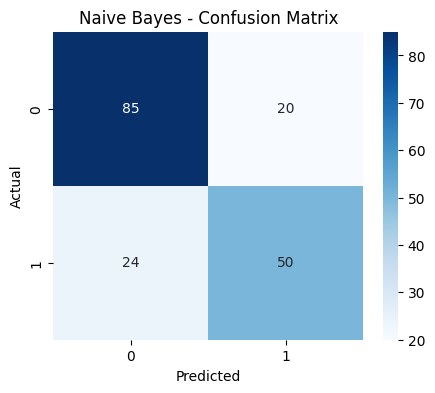

KNN
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       105
           1       0.75      0.59      0.66        74

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.75      0.75      0.74       179



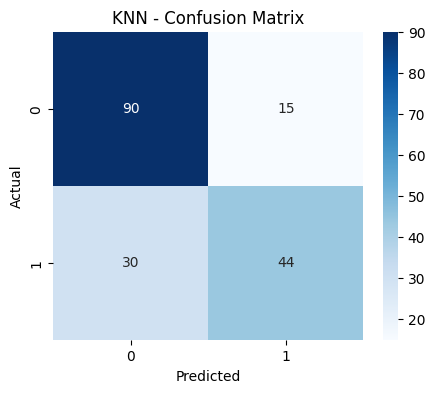

In [44]:
y_pred_tree = cross_val_predict(tree_pipeline, x_test_raw, y_test, cv=3)
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("decision tree")
print(classification_report(y_test, y_pred_tree))

plt.figure(figsize=(5, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


y_pred_nb = cross_val_predict(nb_pipeline, x_test_raw, y_test, cv=3)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_pred_knn = cross_val_predict(knn_pipeline, x_test_raw, y_test, cv=3)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN")
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()